https://archive.ics.uci.edu/dataset/352/online+retail database

<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#imports_data)
2. [Data cleaning](#data_cleaning)
3. [Data preparation](#data_preparation)
4. [Data analysis](#data_analysis) <br>
    4.1. [Top buyers monthly evolution](#month_evolution) <br>
    4.2. [Orders per hour](#orders_hour)

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Import data <a id='imports_data'></a>
[Back to top](#table_of_contents)

In [109]:
initial_data = pd.read_excel(r'E:\git-hub_projects\datasets\Online Retail.xlsx')
initial_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# 2. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

In [110]:
cleaned_data = initial_data.copy()

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'InvoiceDate'}>],
       [<Axes: title={'center': 'UnitPrice'}>,
        <Axes: title={'center': 'CustomerID'}>]], dtype=object)

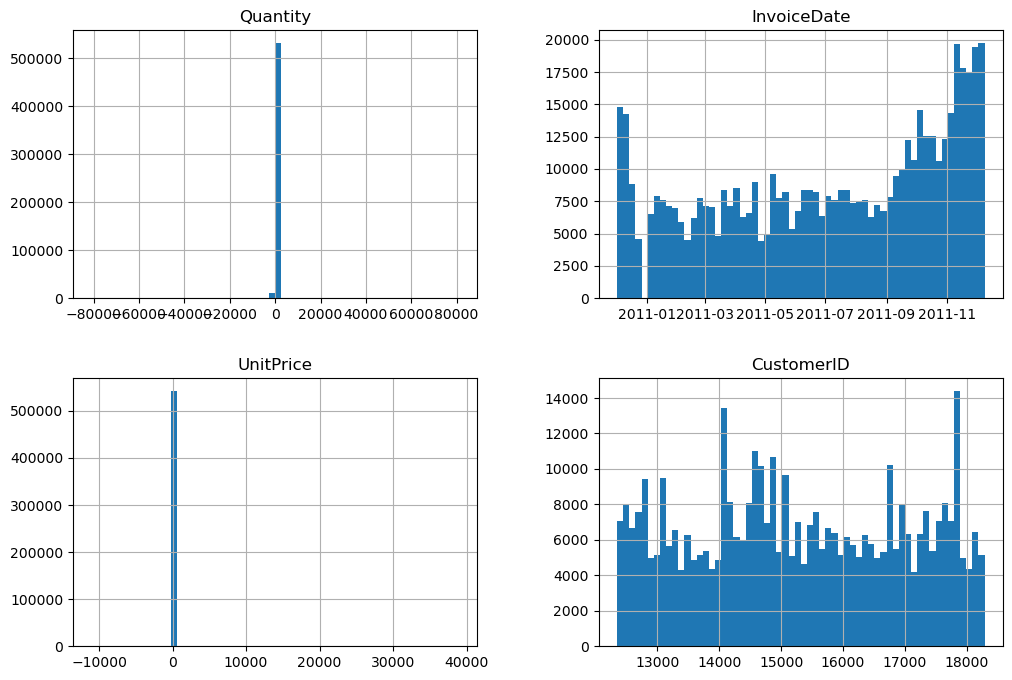

In [111]:
cleaned_data.hist(bins=60, figsize=(12,8))

*There are some anomalies in the UnitPrice and Quantity features*

<Axes: xlabel='index', ylabel='Quantity'>

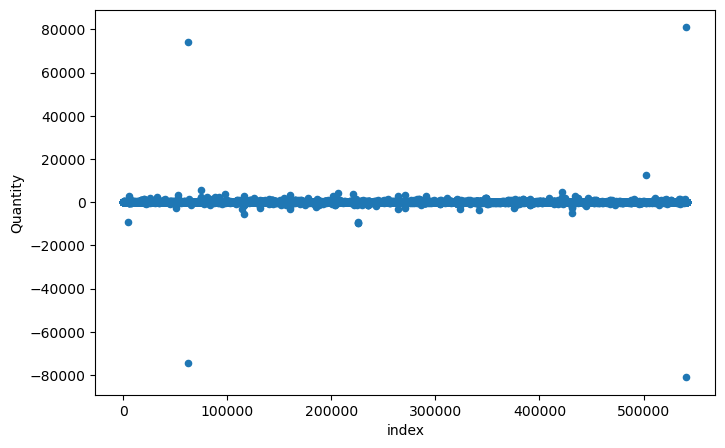

In [112]:
cleaned_data.reset_index().plot(kind='scatter', y='Quantity', x='index', figsize=(8,5))

In [113]:
cleaned_data = cleaned_data[(cleaned_data['Quantity'] > -10000) & (cleaned_data['Quantity'] < 10000)] 

<Axes: xlabel='index', ylabel='Quantity'>

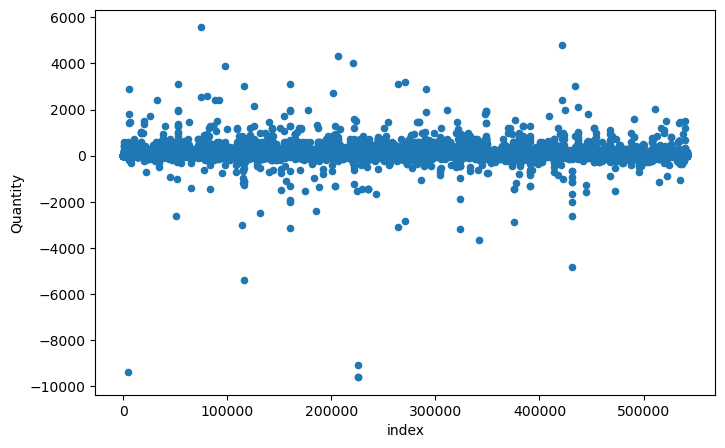

In [114]:
cleaned_data.reset_index().plot(kind='scatter', y='Quantity', x='index', figsize=(8,5))

In [115]:
cleaned_data[cleaned_data['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


*Some of this data can be like returning from the store but is some data that i'm not going to use so i can delete this values (1.97% of the dataset)*

In [116]:
cleaned_data = cleaned_data[cleaned_data['Quantity'] > 0]

<Axes: xlabel='index', ylabel='Quantity'>

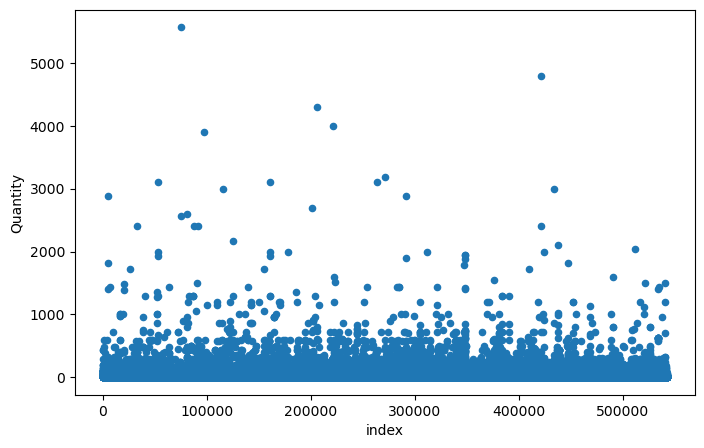

In [117]:
cleaned_data.reset_index().plot(kind='scatter', y='Quantity', x='index', figsize=(8,5))

In [118]:
cleaned_data[cleaned_data['Quantity'] > 500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
730,536437,17021,NAMASTE SWAGAT INCENSE,600,2010-12-01 12:12:00,0.24,13694.0,United Kingdom
3917,536736,22616,PACK OF 12 LONDON TISSUES,600,2010-12-02 12:59:00,0.29,17381.0,United Kingdom
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
4946,536830,21915,RED HARMONICA IN BOX,1400,2010-12-02 17:38:00,1.06,16754.0,United Kingdom
...,...,...,...,...,...,...,...,...
534952,581175,23084,RABBIT NIGHT LIGHT,1440,2011-12-07 15:16:00,1.79,14646.0,Netherlands
537883,581375,21137,BLACK RECORD COVER FRAME,960,2011-12-08 12:36:00,3.39,16210.0,United Kingdom
540061,581457,23543,WALL ART KEEP CALM,698,2011-12-08 18:43:00,4.15,18102.0,United Kingdom
540070,581458,22197,POPCORN HOLDER,1500,2011-12-08 18:45:00,0.72,17949.0,United Kingdom


*Really sparced data and is only 304 values*

In [119]:
cleaned_data = cleaned_data[cleaned_data['Quantity'] < 500]

*Now we will check the Unitprice feature*

<Axes: xlabel='index', ylabel='UnitPrice'>

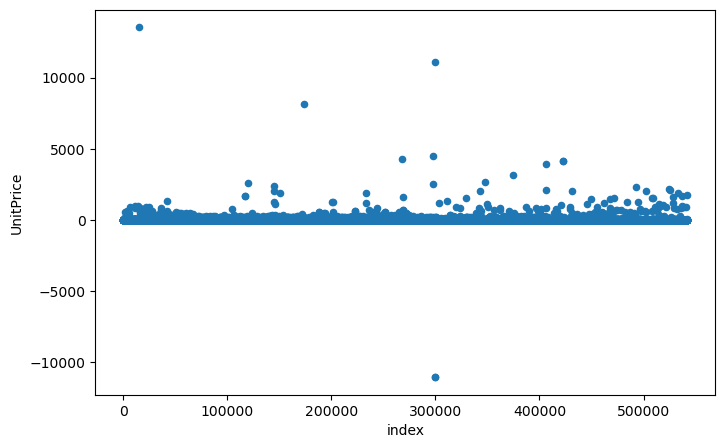

In [120]:
cleaned_data.reset_index().plot(kind='scatter', y='UnitPrice', x='index', figsize=(8,5))

<Axes: xlabel='index', ylabel='UnitPrice'>

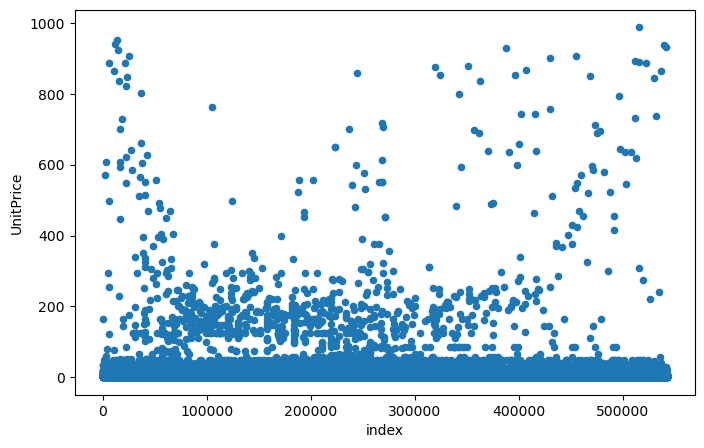

In [121]:
cleaned_data = cleaned_data[(cleaned_data['UnitPrice'] > -10000) & (cleaned_data['UnitPrice'] < 1000)]
cleaned_data.reset_index().plot(kind='scatter', y='UnitPrice', x='index', figsize=(8,5))

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'InvoiceDate'}>],
       [<Axes: title={'center': 'UnitPrice'}>,
        <Axes: title={'center': 'CustomerID'}>]], dtype=object)

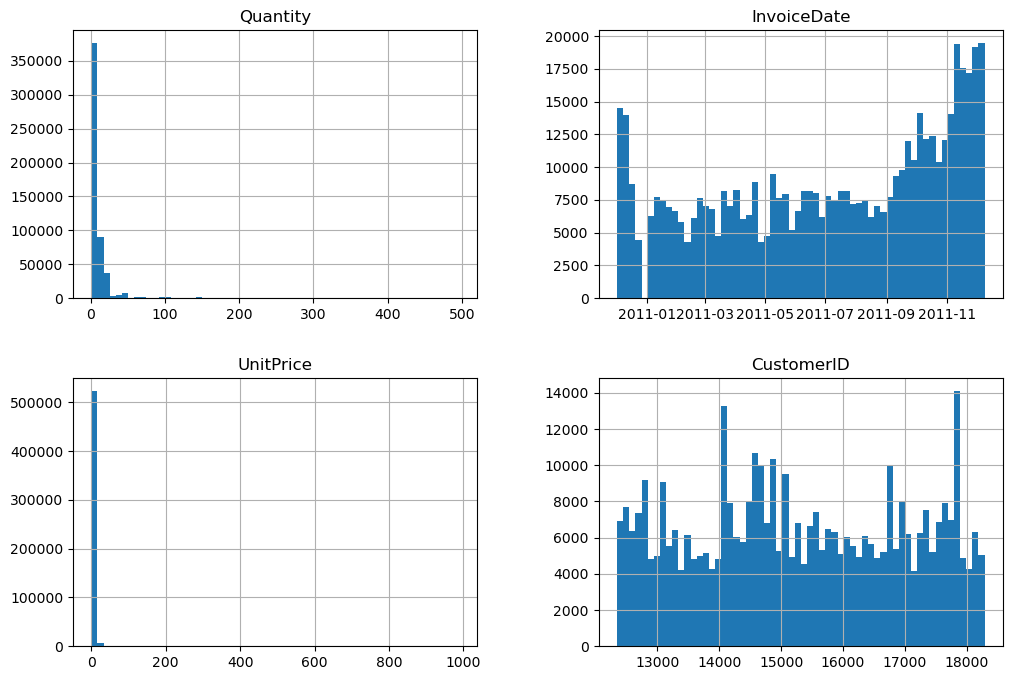

In [122]:
cleaned_data.hist(bins=60, figsize=(12,8))

*As there is no more anomalies with the numerical data, now we will check the nan values in the dataset*

In [123]:
cleaned_data.isna().sum()

InvoiceNo           0
StockCode           0
Description       582
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133301
Country             0
dtype: int64

*Customer ID and article descritpion aren't features that we will be using on this analysis*

In [124]:
cleaned_data = cleaned_data[['Quantity', 'InvoiceDate', 'UnitPrice', 'Country']]

In [125]:
cleaned_data

,Quantity,InvoiceDate,UnitPrice,Country
0,6,2010-12-01 08:26:00,2.55,United Kingdom
1,6,2010-12-01 08:26:00,3.39,United Kingdom
2,8,2010-12-01 08:26:00,2.75,United Kingdom
3,6,2010-12-01 08:26:00,3.39,United Kingdom
4,6,2010-12-01 08:26:00,3.39,United Kingdom
...,...,...,...,...
541904,12,2011-12-09 12:50:00,0.85,France
541905,6,2011-12-09 12:50:00,2.10,France
541906,4,2011-12-09 12:50:00,4.15,France
541907,4,2011-12-09 12:50:00,4.15,France


# 3. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

In [126]:
prepared_data = cleaned_data.copy()

In [127]:
prepared_data.dtypes

Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
dtype: object

*Generating a new column with the total amount payed*

In [128]:
prepared_data['Total Amount'] = prepared_data['Quantity'] * prepared_data['UnitPrice']
prepared_data

,Quantity,InvoiceDate,UnitPrice,Country,Total Amount
0,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
...,...,...,...,...,...
541904,12,2011-12-09 12:50:00,0.85,France,10.20
541905,6,2011-12-09 12:50:00,2.10,France,12.60
541906,4,2011-12-09 12:50:00,4.15,France,16.60
541907,4,2011-12-09 12:50:00,4.15,France,16.60


*Adding new columns: year, month, day of the month, day of the week, hour*

In [129]:
prepared_data['Year'] = prepared_data['InvoiceDate'].dt.year
prepared_data['Month'] = prepared_data['InvoiceDate'].dt.month
prepared_data['Day_of_the_week'] = prepared_data['InvoiceDate'].dt.day_of_week
prepared_data['Day_of_the_month'] = prepared_data['InvoiceDate'].dt.day
prepared_data['Hour'] = prepared_data['InvoiceDate'].dt.hour
prepared_data

,Quantity,InvoiceDate,UnitPrice,Country,Total Amount,Year,Month,Day_of_the_week,Day_of_the_month,Hour
0,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010,12,2,1,8
1,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,2,1,8
2,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010,12,2,1,8
3,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,2,1,8
4,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,2,1,8
...,...,...,...,...,...,...,...,...,...,...
541904,12,2011-12-09 12:50:00,0.85,France,10.20,2011,12,4,9,12
541905,6,2011-12-09 12:50:00,2.10,France,12.60,2011,12,4,9,12
541906,4,2011-12-09 12:50:00,4.15,France,16.60,2011,12,4,9,12
541907,4,2011-12-09 12:50:00,4.15,France,16.60,2011,12,4,9,12


In [130]:
prepared_data.columns

Index(['Quantity', 'InvoiceDate', 'UnitPrice', 'Country', 'Total Amount',
       'Year', 'Month', 'Day_of_the_week', 'Day_of_the_month', 'Hour'],
      dtype='object')

In [131]:
prepared_data = prepared_data[['Quantity', 'Total Amount', 'Year', 'Month', 'Day_of_the_month','Hour', 'Country']]
prepared_data

,Quantity,Total Amount,Year,Month,Day_of_the_month,Hour,Country
0,6,15.30,2010,12,1,8,United Kingdom
1,6,20.34,2010,12,1,8,United Kingdom
2,8,22.00,2010,12,1,8,United Kingdom
3,6,20.34,2010,12,1,8,United Kingdom
4,6,20.34,2010,12,1,8,United Kingdom
...,...,...,...,...,...,...,...
541904,12,10.20,2011,12,9,12,France
541905,6,12.60,2011,12,9,12,France
541906,4,16.60,2011,12,9,12,France
541907,4,16.60,2011,12,9,12,France


# 4. Data analysis <a id='data_analysis'></a>
[Back to top](#table_of_contents)

In [132]:
order_data = prepared_data.sort_values(by=['Year', 'Month', 'Day_of_the_month', 'Hour'])
order_data

,Quantity,Total Amount,Year,Month,Day_of_the_month,Hour,Country
0,6,15.30,2010,12,1,8,United Kingdom
1,6,20.34,2010,12,1,8,United Kingdom
2,8,22.00,2010,12,1,8,United Kingdom
3,6,20.34,2010,12,1,8,United Kingdom
4,6,20.34,2010,12,1,8,United Kingdom
...,...,...,...,...,...,...,...
541904,12,10.20,2011,12,9,12,France
541905,6,12.60,2011,12,9,12,France
541906,4,16.60,2011,12,9,12,France
541907,4,16.60,2011,12,9,12,France


In [133]:
order_data['Country'] = order_data['Country'].apply(lambda x: 'Ireland' if x == 'EIRE' else x)
order_data

,Quantity,Total Amount,Year,Month,Day_of_the_month,Hour,Country
0,6,15.30,2010,12,1,8,United Kingdom
1,6,20.34,2010,12,1,8,United Kingdom
2,8,22.00,2010,12,1,8,United Kingdom
3,6,20.34,2010,12,1,8,United Kingdom
4,6,20.34,2010,12,1,8,United Kingdom
...,...,...,...,...,...,...,...
541904,12,10.20,2011,12,9,12,France
541905,6,12.60,2011,12,9,12,France
541906,4,16.60,2011,12,9,12,France
541907,4,16.60,2011,12,9,12,France


## 4.1 Data analysis <a id='month_evolution'></a>
[Back to top](#table_of_contents)

In [134]:
first_grouped_data = order_data.groupby(['Country'])['Total Amount'].sum().sort_values(ascending=False)

first_countries_names = first_grouped_data[:6].index

Text(0.5, 1.0, 'Top buyers monthly evolution 2010-2012')

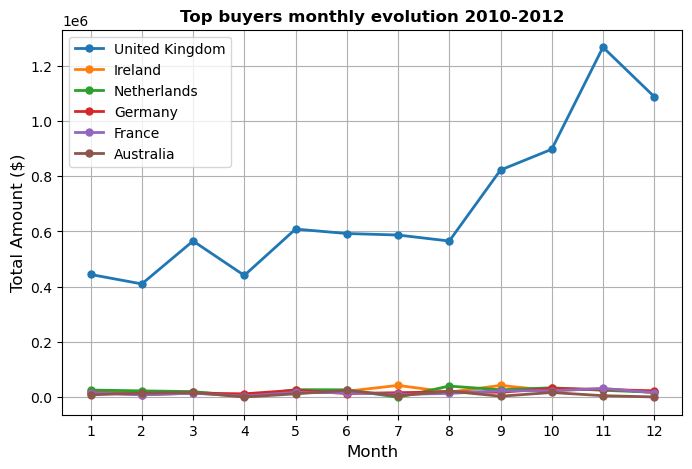

In [135]:
month_country_grouped = order_data.groupby(['Country', 'Month'])['Total Amount'].sum().reset_index()

figure, ax = plt.subplots(figsize=(8,5))

for country in first_countries_names:
    country_data = month_country_grouped[month_country_grouped['Country'] == country]
    ax.plot(country_data['Month'], country_data['Total Amount'], marker='o',
     linewidth=2, markersize=5, label = country)

ax.set_xticks(range(1,13))

ax.grid(True)
ax.legend()
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Total Amount ($)', fontsize=12)
ax.set_title('Top buyers monthly evolution 2010-2012', fontsize=12, fontweight = 'semibold')


*As United Kigndom have many mores boughts than any ohter country we need to splitt into two graphic the info*

In [136]:
from sklearn.metrics import confusion_matrix

second_countries_names = first_grouped_data[1:6].index

data_to_plot = pd.DataFrame()

for country in second_countries_names:
    country_data = month_country_grouped[month_country_grouped['Country'] == country]
    data_to_plot = pd.concat([data_to_plot, country_data])

pivot_table = data_to_plot.pivot_table(values='Total Amount', index='Month', columns='Country', aggfunc='sum')
england_data = month_country_grouped[month_country_grouped['Country'] == 'United Kingdom']

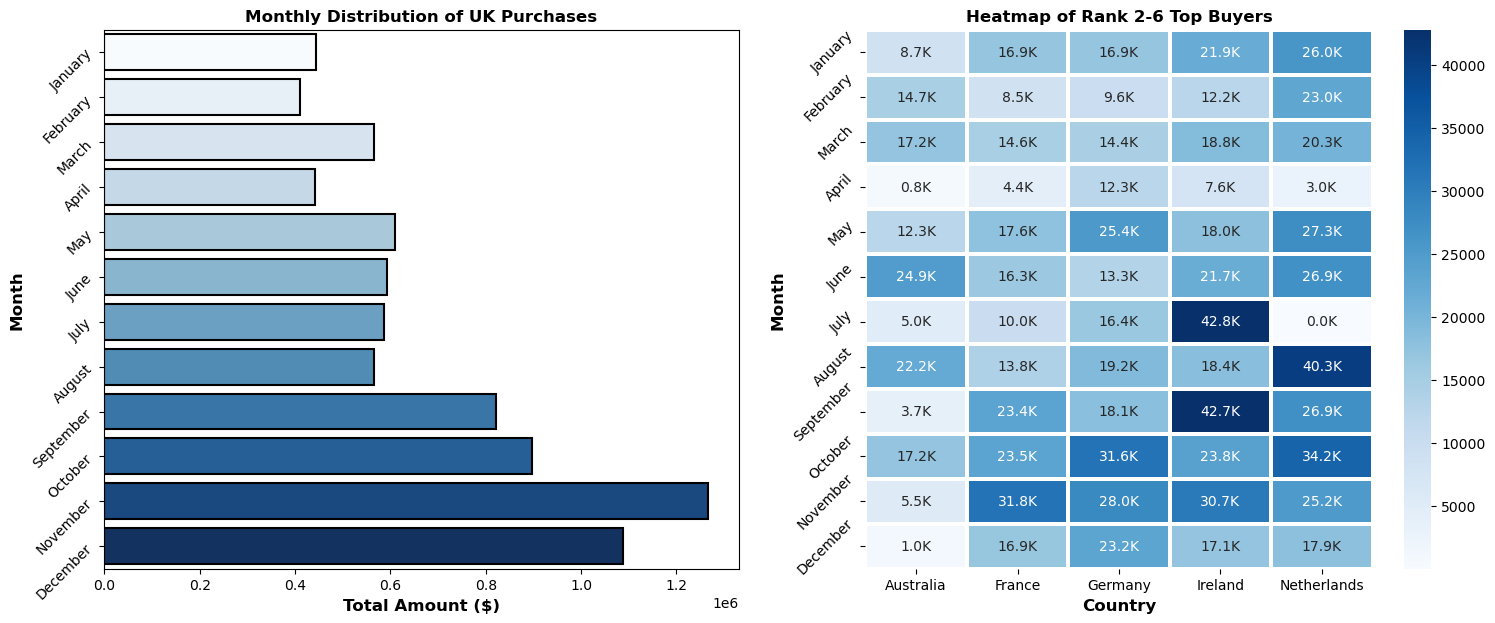

In [137]:
import seaborn as sns
import numpy as np

labels = pd.DataFrame() 

# Month names for axis labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

figure, ax = plt.subplots(ncols=2, figsize=(18,7))

# Chart graph with United Kingdom boughts time evolution
sns.barplot(england_data, x="Total Amount", y="Month", hue='Month', legend=False, palette="Blues", ax = ax[0], edgecolor='black', linewidth=1.5, orient="y")



#Setting the axis label and ticks
ax[0].set_ylabel('Month', fontsize=12, fontweight="bold")
ax[0].set_xlabel('Total Amount ($)', fontsize=12, fontweight="bold")
ax[0].set_yticks(range(0,12))
ax[0].set_yticklabels(month_names, rotation=45, fontsize=10)

#Setting the title
ax[0].set_title('Monthly Distribution of UK Purchases', fontsize=12, fontweight="bold")

# Labels for the heatmap

label_heat = pivot_table.copy().astype(str)

for column in pivot_table.columns:
    label_heat[column] = pivot_table[column].apply(lambda x: f'{x/1000:.1f}K')

# Heatmap 
sns.heatmap(pivot_table, cmap='Blues', fmt = '', annot=label_heat, linewidths = 1.5)

#Setting the axis label and ticks
ax[1].set_xlabel('Country', fontsize=12, fontweight="bold")
ax[1].set_ylabel('Month', fontsize=12, fontweight="bold")
ax[1].set_yticklabels(month_names, rotation=45, fontsize=10)

#Setting the title
ax[1].set_title('Heatmap of Rank 2-6 Top Buyers', fontsize=12, fontweight="bold")

plt.show()

## 4.2 Orders per hour <a id='orders_hour'></a>
[Back to top](#table_of_contents)

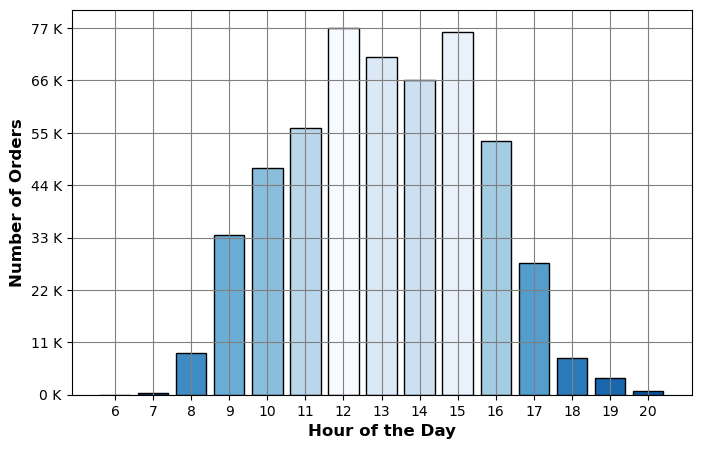

In [138]:
orders_per_hour = order_data['Hour'].value_counts().reset_index()

x_plot = orders_per_hour['Hour']
y_plot = orders_per_hour['count']

cmap = plt.get_cmap('Blues') 
colors = cmap(np.linspace(0, 1, len(x_plot))) 

figure, ax = plt.subplots(figsize=(8,5))

ax.bar(x_plot, y_plot, color=colors, edgecolor='black')

min_y, max_y = min(y_plot), max(y_plot)
y_ticks_positions = np.linspace(min_y, max_y, 8) 
y_ticks_labels = [f"{int(y/1000)} K" for y in y_ticks_positions]

# Set axis ticks
ax.set_xticks(range(6, 21))
ax.set_yticks(y_ticks_positions) 
ax.set_yticklabels(y_ticks_labels) 

# Labels and title
ax.set_xlabel("Hour of the Day", fontsize=12, fontweight="bold")
ax.set_ylabel("Number of Orders", fontsize=12, fontweight="bold")

plt.grid(True, color='grey')
plt.show()